In [161]:
import numpy as np
import matplotlib.pyplot as plt

## Prediction with Gradient Descent

In [162]:
# load data & separate features and label
matrix = np.loadtxt("ex1data2.txt", delimiter=",")
X = matrix[:, :-1]
y = matrix[:, -1]

In [163]:
# initialize key variables
m = len(X)
alpha = 0.1
num_iter = 50
theta = np.zeros(X.shape[1] + 1)

In [164]:
# x_norm = (X - mu)/sigma
def feature_normalize(X, m):
    mu = np.mean(X, axis=0) # 1x2
    sigma = np.std(X, axis=0) # 1x2
    
    X_norm = (X-mu)/sigma 
    return X_norm, mu, sigma

In [165]:
# normalize features
X_norm, mu, sigma = feature_normalize(X, m)

In [166]:
# add ones column
x_ones = np.ones(m) # create ones column 
X_norm = np.column_stack((x_ones, X_norm)) # merge

In [167]:
# J = 1/2m * sum((h-y)^2)
def compute_cost(X, y, theta, m):
    J = 0
    
    h = X.dot(theta.transpose()) # 97x2 * 2x1 = 97x1
    errors = np.square(h - y) # 97x1
    J = 1/(2*m) * sum(errors) # 1x1
    
    return J


def gradient_descent(X, y, theta, alpha, num_iter, m):
    J_history = np.zeros(num_iter) 

    # update theta, compute cost, repeat
    for i in range(num_iter):
        
        h = X.dot(theta.transpose())
        errors = (h - y) 
        theta_delta = (1/m) * alpha * (X.transpose().dot(errors))  
        theta -= theta_delta # adjust theta
    
        J_history[i] = compute_cost(X, y, theta, m) # store cost for that theta

    return J_history

In [168]:
J_history = gradient_descent(X_norm, y, theta, alpha, num_iter, m)

Text(0, 0.5, 'Cost')

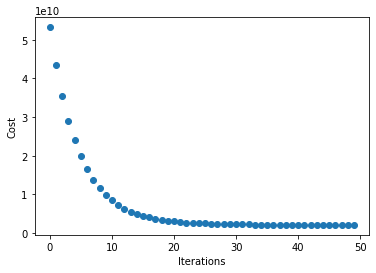

In [169]:
# plot cost vs iterations
plt.scatter(range(50), J_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")

In [170]:
# predict house price 
house = [1650, 3]
X_pred = np.vstack([house, X]) # new X matrix
m_pred = len(X_pred)

# normalize first, and then add ones column
X_norm_pred, mu_pred, sigma_pred = feature_normalize(X_pred, m_pred)
x_ones_pred = np.ones(m_pred) # create ones column for x_norm
X_norm_pred = np.column_stack((x_ones_pred, X_norm_pred)) # merge

# sample * theta = prediction
pred_grad = X_norm_pred[0, :].dot(theta.transpose())
print("Estimated price of 1650sqft and 3 bedroom house: %s%f" % ("$", pred_grad))

Estimated price of 1650sqft and 3 bedroom house: $293254.704805


## Prediction with Normal Equation

In [171]:
""" 
Implement with normal equation

normal equation = (X_trans * X)**-1 * X_trans * y
"""
theta = np.zeros(X.shape[1] + 1) # reintialize theta

x_ones = np.ones(m) 
X = np.column_stack((x_ones, X)) # merge X and ones column

In [172]:
# build equation
first_part = X.transpose().dot(X) # 3x97 * 97x3 = 3x3
first_part = (np.linalg.pinv(first_part)) # pseudo inverse

theta = first_part.dot(X.transpose()).dot(y)

In [173]:
# predict house price
house = [1, 1650, 3]
X = np.vstack([house, X])

pred_normal = X[0, :].dot(theta.transpose())
print("Estimated price of 1650sqft and 3 bedroom house: %s%f" % ("$", pred_normal))

Estimated price of 1650sqft and 3 bedroom house: $293081.464335


In [179]:
# compare gradient descent to normal equation
print("With gradient descent: %s%.2f" % ("$", pred_grad))
print("With normal equation: %s%.2f" % ("$", pred_normal))

With gradient descent: $293254.70
With normal equation: $293081.46
